In [1]:
import os
import glob
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

from scipy import signal
from scipy.fft import fft, fftfreq


import sys
sys.path.insert(0,'..')


from clim_functions.mean_lat_weighted import mean_lat_weighted
from clim_functions.deseasonalize import deseasonalize


In [2]:
# Select run to plot
run = '038'
basedir = os.environ['SCRATCH']+'/MiMA/runs/'
rundir = basedir + run + '/'
print(rundir)

print(glob.glob(rundir+'*.nc'))
filename = 'atmos_daily'
dataset = nc.Dataset(rundir+filename+'.nc', 'r')

lon = dataset['lon']
lat = dataset['lat']
time = dataset['time']
pfull = dataset['pfull']
ucomp = dataset['ucomp']

/scratch/users/lauraman/MiMA/runs/038/
['/scratch/users/lauraman/MiMA/runs/038/atmos_daily.nc', '/scratch/users/lauraman/MiMA/runs/038/atmos_avg.nc']


## QBO plots

In [7]:
# First, we select the 4degS-4degN region and take zonal means for strat. pressure levels 50-10hPa (indices 13-20)
strat_10_50 = list(range(13, 21))
p_strat = pfull[strat_10_50]
u_zonal = mean_lat_weighted( ucomp[:, strat_10_50, 30:34, :].mean(axis=(-1)), lat[30:34], axis=(-1) )
t = time[:]

In [8]:
p_strat_10_50

NameError: name 'p_strat_10_50' is not defined

In [5]:
u_deseason = deseasonalize(u_zonal, t)

NameError: name 't' is not defined

In [ ]:
plt.plot(u_zonal[:,0])
plt.plot(u_deseason[:,0])
plt.title('u at 27 hPa (mid stratosphere)')

## Get QBO metrics: amplitude and period
We can test a few of different ways to calculate the period and amplitudes

In [ ]:
from QBO_metrics.get_QBO_amplitude_DD import get_QBO_amplitude_DD
from QBO_metrics.get_QBO_period_FFT import get_QBO_period_FFT
from QBO_metrics.get_QBO_TT_metrics import get_QBO_TT

### Dunkerton and Delisi method for calculating amplitude
This method first deseasonalizes the data, then filters out high variability, then calculates the standard devation. This can be calculated at multiple height levels.

In [ ]:
amplitudes_DD = get_QBO_amplitude_DD(u_zonal)
amplitudes_DD


### FFT method for calculating period
This method uses an FFT to find the maximum peak in the spectrum. The data is first padded with zeros on either side to increase spectral resolution, we do not need to remove high variability as this will not be the maximum peak of the spectrum. This can be calculated at multiple height levels.

In [ ]:
period_FFT = get_QBO_period_FFT(u_zonal)

### Transition time method
This calculates the time between eastward-westward transitions in the original dataset (no deseasonalizing)
after smoothing witha 5 month running mean. This can be calculated at multiple height levels, but needs to be done independently.

In [ ]:
period_and_amplitude_TT = np.array([(get_QBO_TT(u_zonal[:,i], return_amplitude=True)) 
                                    for i in range(u_zonal.shape[1]) ])

period_TT = period_and_amplitude_TT[:,0]
amplitude_TT = period_and_amplitude_TT[:,1]


In [ ]:
periods_TT, amplitudes_TT = get_QBO_TT(u_zonal[:,1], return_amplitude=True)
periods_TT, amplitudes_TT 

In [ ]:
## Check plots

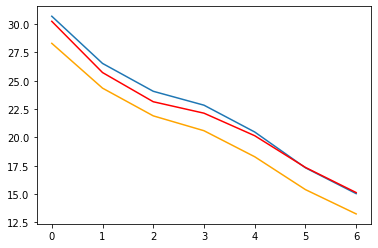

In [49]:
plt.plot(p_strat, amplitude_TT, label='TT', fmt='kx')
plt.plot(p_strat, amplitude_DD, label='DD', fmt='rx')
plt.legend()


In [58]:
plt.plot(p_strat, period_TT, label='TT', fmt='kx')
plt.plot(p_strat, period_FFT, label='FFT', fmt='bx')
plt.legend()


(array([25.71232033, 25.48795891, 24.38396835]),
 array([1.96388889, 1.96388889, 2.06666667]))

In [60]:
avg_amplitude = np.average(amplitudes, weights=periods_yr)

In [61]:
avg_amplitude

25.18084794929229

In [63]:
from QBO_metrics.get_QBO_amplitude_DD import get_QBO_amplitude_DD

In [99]:
shape_u = u_zonal.shape
shape_u1 = u_zonal.shape[1:]
shape_u0 = shape_u[0]*10
new_shape = (shape_u0, shape_u1[:])
new_shape

(70, ())

In [98]:
u_zonal = u_zonal[-1]